In [25]:
#Import Library
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [26]:
#Import Dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

In [27]:
#Standarisasi Data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [28]:
#Ubah Bentuk Data dengan encoding
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

In [29]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

#  **1. Perceptron**

In [30]:
#Membuat Fungsi Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [31]:
#Membuat Fungsi Sigmoid Derivative
def sigmoid_derivative(x):
    return x * (1 - x)

In [32]:
input_size = X_train.shape[1]  # Menentukan ukuran input berdasarkan jumlah fitur pada data latih
output_size = 3  # Menentukan ukuran output (jumlah kelas)
learning_rate = 0.01  # Menentukan nilai learning rate untuk pembelajaran
perceptron_acc = []  # Membuat list kosong untuk menyimpan akurasi model Perceptron
perceptron_epochs_logged = []  # Membuat list kosong untuk mencatat epoch yang dilog


In [33]:
# Tetapkan seed random untuk memastikan hasil yang dapat direproduksi
np.random.seed(1) 

# Inisialisasi bobot secara acak dengan nilai dalam rentang [-1, 1]
w = 2 * np.random.random((input_size, output_size)) - 1  # Initialize weights randomly with values in range [-1, 1]

# Inisialisasi bias dengan nilai nol
b = np.zeros((1, output_size))  # Initialize biases with zeros

In [34]:
for epoch in range(5000):
    # ====== Forward Propagation ======
    # Menghitung input ke layer output
    z = np.dot(X_train, w) + b
    # Menerapkan fungsi aktivasi sigmoid
    a = sigmoid(z)

    # ====== Hitung Loss ======
    # Menggunakan Mean Squared Error (MSE) sebagai fungsi loss
    loss = np.mean(np.square(y_train - a))

    # ====== Backward Propagation ======
    # Menghitung error antara label sebenarnya dan prediksi
    error = y_train - a
    # Menghitung delta (gradien) untuk update bobot
    delta = error * sigmoid_derivative(a)

    # ====== Update Bobot dan Bias ======
    w += learning_rate * np.dot(X_train.T, delta)
    b += learning_rate * np.sum(delta, axis=0, keepdims=True)

    # ====== Logging setiap 100 epoch ======
    if epoch % 100 == 0:
        # Hitung akurasi berdasarkan prediksi dan label sebenarnya
        acc = np.mean(np.argmax(a, axis=1) == np.argmax(y_train, axis=1))
        perceptron_acc.append(acc)
        perceptron_epochs_logged.append(epoch)
        print(f"Epoch {epoch}, Loss: {np.mean(np.abs(error)):.4f}, Accuracy: {acc * 100:.2f}%")


Epoch 0, Loss: 0.4738, Accuracy: 49.17%
Epoch 100, Loss: 0.1965, Accuracy: 89.17%
Epoch 200, Loss: 0.1777, Accuracy: 90.83%
Epoch 300, Loss: 0.1681, Accuracy: 91.67%
Epoch 400, Loss: 0.1620, Accuracy: 92.50%
Epoch 500, Loss: 0.1576, Accuracy: 93.33%
Epoch 600, Loss: 0.1543, Accuracy: 93.33%
Epoch 700, Loss: 0.1517, Accuracy: 93.33%
Epoch 800, Loss: 0.1496, Accuracy: 93.33%
Epoch 900, Loss: 0.1479, Accuracy: 93.33%
Epoch 1000, Loss: 0.1465, Accuracy: 93.33%
Epoch 1100, Loss: 0.1452, Accuracy: 93.33%
Epoch 1200, Loss: 0.1442, Accuracy: 93.33%
Epoch 1300, Loss: 0.1432, Accuracy: 93.33%
Epoch 1400, Loss: 0.1424, Accuracy: 93.33%
Epoch 1500, Loss: 0.1416, Accuracy: 93.33%
Epoch 1600, Loss: 0.1410, Accuracy: 93.33%
Epoch 1700, Loss: 0.1403, Accuracy: 93.33%
Epoch 1800, Loss: 0.1398, Accuracy: 93.33%
Epoch 1900, Loss: 0.1393, Accuracy: 93.33%
Epoch 2000, Loss: 0.1388, Accuracy: 93.33%
Epoch 2100, Loss: 0.1383, Accuracy: 93.33%
Epoch 2200, Loss: 0.1379, Accuracy: 94.17%
Epoch 2300, Loss: 0.137

In [35]:
# Menghitung nilai z untuk data uji dengan menggunakan bobot (w) dan bias (b)
z_test = np.dot(X_test, w) + b

# Menerapkan fungsi aktivasi sigmoid pada hasil z
a_test = sigmoid(z_test)

# Mengambil indeks dengan nilai probabilitas tertinggi sebagai prediksi kelas
y_pred = np.argmax(a_test, axis=1)

# Mengambil label asli dari data uji (jika one-hot encoded, ambil indeks kelas sebenarnya)
y_true = np.argmax(y_test, axis=1)

# Menghitung akurasi dengan membandingkan prediksi dan label sebenarnya
accuracy = np.mean(y_pred == y_true)

# Menampilkan akurasi dalam format persentase dengan dua angka di belakang koma
print(f"Akurasi Perceptron: {accuracy * 100:.2f}%")


Akurasi Perceptron: 100.00%


In [36]:
# Menghitung objek Kmeans dengan jumlah cluster = 3
kmeans = KMeans(n_clusters=3, random_state=0)

# Melakukan clustering pada output dari perceptron (variabel 'a')
clusters = kmeans.fit_predict(a)

In [37]:
# Membuat objek PCA untuk mereduksi dimensi menjadi 2
pca = PCA(n_components=2)

# Menerapkan PCA pada output dari perceptron (variabel 'a')
a_pca = pca.fit_transform(a)

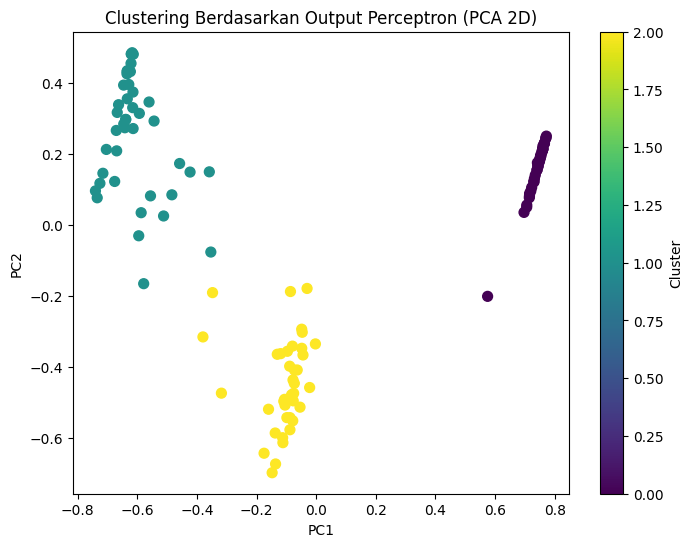

In [38]:
# Menampilkan hasil clustering dan PCA dalam bentuk scatter plot

plt.figure(figsize=(8,6))
plt.scatter(a_pca[:, 0], a_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Clustering Berdasarkan Output Perceptron (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [40]:
y_true = np.argmax(y_test, axis=1)

In [41]:
cm = confusion_matrix(y_true, y_pred)

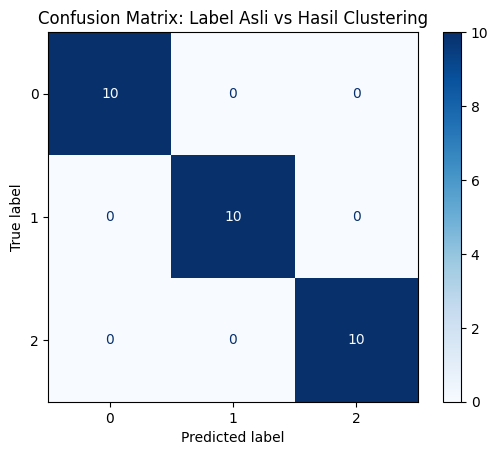

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Label Asli vs Hasil Clustering")
plt.show()

# **2. Shallow Neural Network**

In [43]:
# Menetapkan seed untuk generator bilangan acak agar hasilnya konsisten/reproducible
np.random.seed(2)

# Menentukan jumlah neuron pada lapisan tersembunyi (hidden layer)
hidden_size = 6

# Membuat list kosong untuk menyimpan akurasi model SNN pada setiap epoch
snn_acc_list = []

# Membuat list kosong untuk mencatat epoch saat akurasi dicatat/logging dilakukan
snn_epochs_logged = []


In [44]:
# Inisialisasi bobot untuk lapisan pertama (input ke hidden), nilai acak antara -1 dan 1
w1 = 2 * np.random.rand(input_size, hidden_size) - 1

# Inisialisasi bias untuk lapisan pertama dengan nilai nol
b1 = np.zeros((1, hidden_size))

# Inisialisasi bobot untuk lapisan kedua (hidden ke output), nilai acak antara -1 dan 1
w2 = 2 * np.random.rand(hidden_size, output_size) - 1

# Inisialisasi bias untuk lapisan kedua dengan nilai nol
b2 = np.zeros((1, output_size))


In [45]:
for epoch in range(5000):
    # Forward propagation
    # Menghitung input untuk lapisan tersembunyi
    z1 = np.dot(X_train, w1) + b1
    # Menerapkan fungsi aktivasi sigmoid pada lapisan tersembunyi
    a1 = sigmoid(z1)
    # Menghitung input untuk lapisan output
    z2 = np.dot(a1, w2) + b2
    # Menerapkan fungsi aktivasi sigmoid pada lapisan output
    a2 = sigmoid(z2)

    # Menghitung error antara label sebenarnya dan prediksi
    error = y_train - a2
    # Menghitung turunan dari error terhadap output (lapisan kedua)
    dA2 = error * sigmoid_derivative(a2)
    # Gradien bobot dan bias untuk lapisan kedua (output)
    dW2 = np.dot(a1.T, dA2)
    db2 = np.sum(dA2, axis=0, keepdims=True)

    # Backpropagation ke lapisan pertama (hidden)
    dA1 = np.dot(dA2, w2.T) * sigmoid_derivative(a1)
    dW1 = np.dot(X_train.T, dA1)
    db1 = np.sum(dA1, axis=0, keepdims=True)

    # Update bobot dan bias dengan gradient descent
    w2 += learning_rate * dW2
    b2 += learning_rate * db2
    w1 += learning_rate * dW1
    b1 += learning_rate * db1

    # Setiap 100 epoch, hitung dan simpan akurasi serta cetak hasilnya
    if epoch % 100 == 0:
        snn_acc = np.mean(np.argmax(a2, axis=1) == np.argmax(y_train, axis=1))
        snn_acc_list.append(snn_acc)
        snn_epochs_logged.append(epoch)
        print(f"Epoch {epoch}, Loss: {np.mean(np.abs(error)):.4f}, Accuracy: {snn_acc * 100:.2f}%")


Epoch 0, Loss: 0.4841, Accuracy: 33.33%
Epoch 100, Loss: 0.2576, Accuracy: 87.50%
Epoch 200, Loss: 0.2031, Accuracy: 90.00%
Epoch 300, Loss: 0.1653, Accuracy: 93.33%
Epoch 400, Loss: 0.1354, Accuracy: 95.00%
Epoch 500, Loss: 0.1136, Accuracy: 95.83%
Epoch 600, Loss: 0.0985, Accuracy: 96.67%
Epoch 700, Loss: 0.0878, Accuracy: 96.67%
Epoch 800, Loss: 0.0800, Accuracy: 96.67%
Epoch 900, Loss: 0.0740, Accuracy: 96.67%
Epoch 1000, Loss: 0.0693, Accuracy: 96.67%
Epoch 1100, Loss: 0.0655, Accuracy: 96.67%
Epoch 1200, Loss: 0.0624, Accuracy: 96.67%
Epoch 1300, Loss: 0.0597, Accuracy: 96.67%
Epoch 1400, Loss: 0.0574, Accuracy: 97.50%
Epoch 1500, Loss: 0.0554, Accuracy: 97.50%
Epoch 1600, Loss: 0.0536, Accuracy: 97.50%
Epoch 1700, Loss: 0.0521, Accuracy: 97.50%
Epoch 1800, Loss: 0.0507, Accuracy: 97.50%
Epoch 1900, Loss: 0.0494, Accuracy: 97.50%
Epoch 2000, Loss: 0.0483, Accuracy: 97.50%
Epoch 2100, Loss: 0.0472, Accuracy: 97.50%
Epoch 2200, Loss: 0.0463, Accuracy: 97.50%
Epoch 2300, Loss: 0.045

Epoch 3300, Loss: 0.0393, Accuracy: 98.33%
Epoch 3400, Loss: 0.0389, Accuracy: 98.33%
Epoch 3500, Loss: 0.0384, Accuracy: 98.33%
Epoch 3600, Loss: 0.0381, Accuracy: 98.33%
Epoch 3700, Loss: 0.0377, Accuracy: 98.33%
Epoch 3800, Loss: 0.0373, Accuracy: 98.33%
Epoch 3900, Loss: 0.0370, Accuracy: 98.33%
Epoch 4000, Loss: 0.0367, Accuracy: 98.33%
Epoch 4100, Loss: 0.0364, Accuracy: 98.33%
Epoch 4200, Loss: 0.0361, Accuracy: 98.33%
Epoch 4300, Loss: 0.0358, Accuracy: 98.33%
Epoch 4400, Loss: 0.0355, Accuracy: 98.33%
Epoch 4500, Loss: 0.0353, Accuracy: 98.33%
Epoch 4600, Loss: 0.0350, Accuracy: 98.33%
Epoch 4700, Loss: 0.0348, Accuracy: 98.33%
Epoch 4800, Loss: 0.0346, Accuracy: 98.33%
Epoch 4900, Loss: 0.0343, Accuracy: 98.33%


In [46]:
# Forward propagation pada data uji
# Menghitung input untuk lapisan tersembunyi dari data uji
Z1_test = np.dot(X_test, w1) + b1

# Menerapkan fungsi aktivasi sigmoid pada lapisan tersembunyi (data uji)
A1_test = sigmoid(Z1_test)

# Menghitung input untuk lapisan output dari data uji
Z2_test = np.dot(A1_test, w2) + b2

# Menerapkan fungsi aktivasi sigmoid pada lapisan output (data uji)
A2_test = sigmoid(Z2_test)


In [47]:
# Mengambil indeks dengan nilai probabilitas tertinggi dari output sebagai prediksi kelas
y_pred = np.argmax(A2_test, axis=1)

# Mengambil label sebenarnya dari data uji (diasumsikan one-hot encoded)
y_true = np.argmax(y_test, axis=1)

# Menghitung akurasi prediksi dengan membandingkan hasil prediksi dan label sebenarnya
accuracy = np.mean(y_pred == y_true)

# Menampilkan akurasi akhir dari model Shallow Neural Network
print(f"Akurasi Shallow Neural Network: {accuracy * 100:.2f}%")


Akurasi Shallow Neural Network: 100.00%


# **3. MultiLayer Perception (MLP)**

In [48]:
# Menetapkan seed agar hasil acak tetap konsisten setiap kali program dijalankan
np.random.seed(2)

# Menentukan jumlah neuron pada hidden layer pertama
hidden1 = 6

# Menentukan jumlah neuron pada hidden layer kedua
hidden2 = 4

# List kosong untuk menyimpan akurasi model MLP pada setiap epoch
mlp_acc_list = []

# List kosong untuk mencatat epoch saat akurasi dicatat
mlp_epochs_logged = []


In [49]:
# Inisialisasi bobot untuk layer pertama (input → hidden1), dengan nilai acak antara -1 dan 1
W1 = 2 * np.random.rand(input_size, hidden1) - 1

# Inisialisasi bias untuk layer pertama dengan nilai nol
b1 = np.zeros((1, hidden1))

# Inisialisasi bobot untuk layer kedua (hidden1 → hidden2), dengan nilai acak antara -1 dan 1
W2 = 2 * np.random.rand(hidden1, hidden2) - 1

# Inisialisasi bias untuk layer kedua dengan nilai nol
b2 = np.zeros((1, hidden2))

# Inisialisasi bobot untuk layer ketiga (hidden2 → output), dengan nilai acak antara -1 dan 1
W3 = 2 * np.random.rand(hidden2, output_size) - 1

# Inisialisasi bias untuk layer ketiga dengan nilai nol
b3 = np.zeros((1, output_size))


In [50]:
for epoch in range(5000):
    # ====== Forward Propagation ======
    # Input ke hidden layer 1
    Z1 = np.dot(X_train, W1) + b1
    A1 = sigmoid(Z1)

    # Hidden layer 1 ke hidden layer 2
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    # Hidden layer 2 ke output layer
    Z3 = np.dot(A2, W3) + b3
    A3 = sigmoid(Z3)  # Output akhir dari MLP

    # ====== Backward Propagation ======
    # Menghitung error antara label sebenarnya dan output
    error = y_train - A3

    # Gradien untuk output layer
    dA3 = error * sigmoid_derivative(A3)
    dW3 = np.dot(A2.T, dA3)
    db3 = np.sum(dA3, axis=0, keepdims=True)

    # Gradien untuk hidden layer kedua
    dA2 = np.dot(dA3, W3.T) * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dA2)
    db2 = np.sum(dA2, axis=0, keepdims=True)

    # Gradien untuk hidden layer pertama
    dA1 = np.dot(dA2, W2.T) * sigmoid_derivative(A1)
    dW1 = np.dot(X_train.T, dA1)
    db1 = np.sum(dA1, axis=0, keepdims=True)

    # ====== Update Parameter (Gradient Descent) ======
    W3 += learning_rate * dW3
    b3 += learning_rate * db3
    W2 += learning_rate * dW2
    b2 += learning_rate * db2
    W1 += learning_rate * dW1
    b1 += learning_rate * db1

    # ====== Logging setiap 100 epoch ======
    if epoch % 100 == 0:
        # Hitung akurasi berdasarkan prediksi dan label sebenarnya
        acc = np.mean(np.argmax(A3, axis=1) == np.argmax(y_train, axis=1))
        mlp_acc_list.append(acc)
        mlp_epochs_logged.append(epoch)
        print(f"Epoch {epoch}, Loss: {np.mean(np.abs(error)):.4f}, Accuracy: {acc * 100:.2f}%")


Epoch 0, Loss: 0.5012, Accuracy: 33.33%


Epoch 100, Loss: 0.3341, Accuracy: 67.50%
Epoch 200, Loss: 0.2665, Accuracy: 85.00%
Epoch 300, Loss: 0.2268, Accuracy: 93.33%
Epoch 400, Loss: 0.1781, Accuracy: 96.67%
Epoch 500, Loss: 0.1381, Accuracy: 96.67%
Epoch 600, Loss: 0.1133, Accuracy: 96.67%
Epoch 700, Loss: 0.0978, Accuracy: 96.67%
Epoch 800, Loss: 0.0873, Accuracy: 96.67%
Epoch 900, Loss: 0.0796, Accuracy: 96.67%
Epoch 1000, Loss: 0.0736, Accuracy: 97.50%
Epoch 1100, Loss: 0.0688, Accuracy: 98.33%
Epoch 1200, Loss: 0.0649, Accuracy: 98.33%
Epoch 1300, Loss: 0.0616, Accuracy: 98.33%
Epoch 1400, Loss: 0.0587, Accuracy: 98.33%
Epoch 1500, Loss: 0.0563, Accuracy: 98.33%
Epoch 1600, Loss: 0.0542, Accuracy: 98.33%
Epoch 1700, Loss: 0.0523, Accuracy: 98.33%
Epoch 1800, Loss: 0.0507, Accuracy: 98.33%
Epoch 1900, Loss: 0.0492, Accuracy: 98.33%
Epoch 2000, Loss: 0.0478, Accuracy: 98.33%
Epoch 2100, Loss: 0.0466, Accuracy: 98.33%
Epoch 2200, Loss: 0.0455, Accuracy: 98.33%
Epoch 2300, Loss: 0.0444, Accuracy: 98.33%
Epoch 2400, Loss: 0.

In [51]:
# ====== Forward Propagation pada Data Uji ======

# Input ke hidden layer pertama
Z1_test = np.dot(X_test, W1) + b1
A1_test = sigmoid(Z1_test)

# Hidden layer pertama ke hidden layer kedua
Z2_test = np.dot(A1_test, W2) + b2
A2_test = sigmoid(Z2_test)

# Hidden layer kedua ke output layer
Z3_test = np.dot(A2_test, W3) + b3
A3_test = sigmoid(Z3_test)  # Output akhir dari data uji


In [52]:
# Mengambil indeks dengan nilai tertinggi dari output sebagai prediksi kelas
y_pred = np.argmax(A3_test, axis=1)

# Mengambil label sebenarnya dari data uji (diasumsikan one-hot encoded)
y_true = np.argmax(y_test, axis=1)

# Menghitung akurasi dengan membandingkan prediksi dan label sebenarnya
accuracy = np.mean(y_pred == y_true)

# Menampilkan akurasi akhir dari model MLP
print(f"Akurasi MLP: {accuracy * 100:.2f}%")


Akurasi MLP: 100.00%


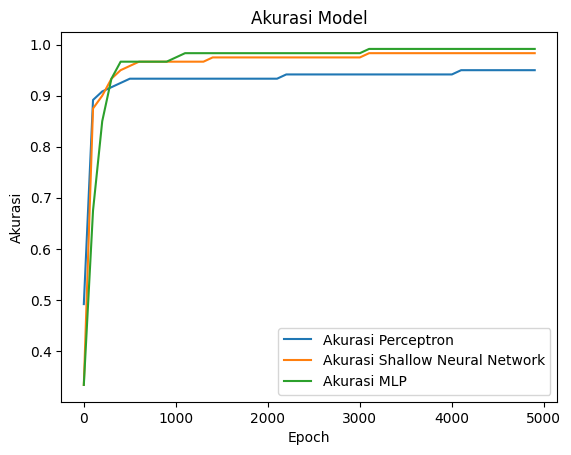

In [53]:
plt.plot(perceptron_epochs_logged, perceptron_acc, label='Akurasi Perceptron')
plt.plot(snn_epochs_logged, snn_acc_list, label='Akurasi Shallow Neural Network')
plt.plot(mlp_epochs_logged, mlp_acc_list, label='Akurasi MLP')

plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()